In [ ]:
"""
Huấn luyện và đánh giá mô hình CNN để phân loại hình ảnh não có khối u hay không.

Các chức năng chính:
- Tải dữ liệu huấn luyện và kiểm tra từ thư mục `train` và `test`.
- Chuẩn bị dữ liệu bằng cách chuẩn hóa, tạo batch và prefetch.
- Xây dựng mô hình CNN với kiến trúc gồm các lớp Convolution, MaxPooling, Dense.
- Huấn luyện mô hình trong số epoch được chỉ định.
- Đánh giá hiệu suất mô hình trên tập dữ liệu kiểm tra.
- Vẽ đồ thị hiển thị độ chính xác và hàm mất mát qua các epoch.
- Dự đoán các hình ảnh trong tập kiểm tra và hiển thị kết quả.
- Tính toán và hiển thị ma trận nhầm lẫn.
"""


In [2]:
import pandas as pd
import numpy as np
import os
import glob

import PIL
from PIL import Image
import imageio

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import seaborn as sn
import numpy as np
import pathlib

In [2]:
batch_size = 32
img_height = 150
img_width = 150

In [3]:

train_dir = pathlib.Path("D:/proj/IE221.PYTHON/final/dataset/train/")
test_dir = pathlib.Path("D:/proj/IE221.PYTHON/final/dataset/test/")

In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=None,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  validation_split=None,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2100 files belonging to 2 classes.
Found 900 files belonging to 2 classes.


In [5]:
class_names = train_ds.class_names
print(class_names)

['non-tumorous', 'tumorous']


In [6]:
normalization_layer =  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3))

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))

d:\python\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:18: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
# Xây dựng model
num_classes = 2
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)), 
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(255, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])


model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

hist = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=8
)


Epoch 1/8
66/66 ━━━━━━━━━━━━━━━━━━━━ 44s 630ms/step - accuracy: 0.7190 - loss: 0.5447 - val_accuracy: 0.7900 - val_loss: 0.4488
Epoch 2/8
66/66 ━━━━━━━━━━━━━━━━━━━━ 33s 503ms/step - accuracy: 0.8536 - loss: 0.3250 - val_accuracy: 0.8078 - val_loss: 0.5867
Epoch 3/8
66/66 ━━━━━━━━━━━━━━━━━━━━ 32s 490ms/step - accuracy: 0.9109 - loss: 0.2071 - val_accuracy: 0.8944 - val_loss: 0.2896
Epoch 4/8
66/66 ━━━━━━━━━━━━━━━━━━━━ 33s 493ms/step - accuracy: 0.9743 - loss: 0.0765 - val_accuracy: 0.9011 - val_loss: 0.3458
Epoch 5/8
66/66 ━━━━━━━━━━━━━━━━━━━━ 32s 488ms/step - accuracy: 0.9918 - loss: 0.0332 - val_accuracy: 0.9200 - val_loss: 0.2966
Epoch 6/8
66/66 ━━━━━━━━━━━━━━━━━━━━ 32s 487ms/step - accuracy: 0.9909 - loss: 0.0270 - val_accuracy: 0.9222 - val_loss: 0.3075
Epoch 7/8
66/66 ━━━━━━━━━━━━━━━━━━━━ 33s 499ms/step - accuracy: 0.9917 - loss: 0.0290 - val_accuracy: 0.9267 - val_loss: 0.2519
Epoch 8/8
66/66 ━━━━━━━━━━━━━━━━━━━━ 33s 498ms/step - accuracy: 0.9884 - loss: 0.0330 - val_accuracy: 0.

In [14]:
model = tf.keras.models.load_model("D:\\proj\\IE221.PYTHON\\final\\model\\tumor-reg.keras")

d:\python\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9248)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 255)            │     2,358,495 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           512 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,756,800 (18.15 MB)

 Trainable params: 2,378,399 (9.07 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,378,401 (9.07 MB)

In [11]:
def plot_metrics(history):
  """
    Vẽ đồ thị hiển thị độ chính xác và hàm mất mát qua các epoch.
    
    Args:
        history: Mô hình đã được huấn luyện từ model.fit.
    """
  metrics = ['loss', 'accuracy']
  for n, metric in enumerate(metrics):
    try:
      name = metric.replace("_"," ").capitalize()
      plt.plot(history.epoch, history.history[metric], label='Train')
      plt.plot(history.epoch, history.history['val_'+metric], linestyle="--", label='Val')
      plt.xlabel('Epoch')
      plt.ylabel(name)
      if metric == 'loss':
        plt.ylim([0, plt.ylim()[1]])
      elif metric == 'auc':
        plt.ylim([0.8,1])
      else:
        plt.ylim([0,1])
      plt.legend()
      plt.show()  
    except:
      pass

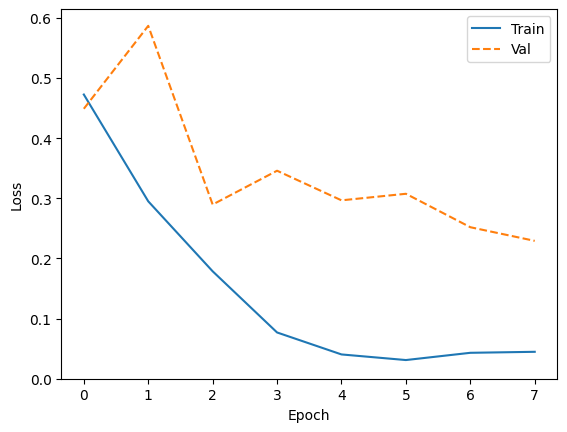

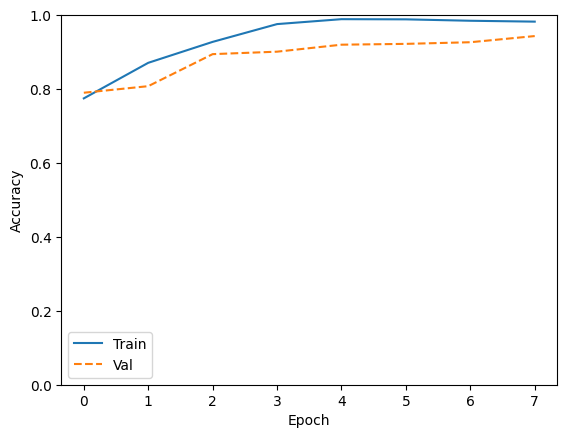

In [12]:
plot_metrics(hist)

In [16]:
model.save('tumor-reg.keras') 

In [49]:
def list_files(dir,full_dir):
    """
    Liệt kê các file trong thư mục và trả về DataFrame chứa đường dẫn của các file.
    
    Args:
        dir (str): Đường dẫn đến thư mục chứa các file.
        full_dir (str): Tên của thư mục.
        
    Returns:
        pandas.DataFrame: DataFrame chứa đường dẫn của các file trong thư mục.
    """
    r = []
    r1 = []
    for root, dirs, files in os.walk(dir):
        for name in files:
            rr = os.path.join(root, name)
            r.append(rr)
    dd = {'local_path':r}
    df = pd.DataFrame(dd)
    return df

def proccess(img1):
  """
    Dự đoán nhãn của một ảnh bằng mô hình đã huấn luyện và tính toán độ chính xác dự đoán.

    Args:
        img1 (str): Đường dẫn đến file ảnh cần dự đoán.

    Returns:
        pred (str): Nhãn dự đoán ("tumorous" hoặc "non-tumorous").
        score1 (float): Độ chính xác dự đoán (phần trăm từ 0 đến 100).
  """
  img = tf.keras.preprocessing.image.load_img(
      img1, target_size=(img_height, img_width)
  )
  img_array = tf.keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0) # Create a batch

  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])

  pred = class_names[np.argmax(score)]
  score1 = 100 * np.max(score)

  return pred, score1

def new_col(col):
    """
    Tạo cột kiểm tra cho DataFrame dựa trên sự khác biệt giữa nhãn dự đoán và nhãn thực tế.
    
    Args:
        col (pandas.Series): Một dòng trong DataFrame.
        
    Returns:
        int: 1 nếu dự đoán đúng, 0 nếu dự đoán sai.
    """
    if col['Pred'] == 'tumorous' and col['Actual'] == 'tumorous':
        return 1
    elif col['Pred'] == 'non-tumorous' and col['Actual'] == 'non-tumorous':
      return 1
    else:
      return 0


def proccess1(df):
  """
    Dự đoán nhãn cho một tập dữ liệu ảnh và tạo DataFrame mới với các kết quả dự đoán.
    
    Args:
        df (pandas.DataFrame): DataFrame chứa đường dẫn của các file ảnh.
        
    Returns:
        pandas.DataFrame: DataFrame mới chứa đường dẫn, nhãn thực tế, nhãn dự đoán, độ chính xác dự đoán và một cột kiểm tra.
  """
  aa = []
  bb = []
  cc = []

  for a,b in df.iterrows():
    img = b['local_path']
    pred, value = proccess(img)
    pat = b['local_path']
    
    val = pat.split('\\')[6]
    
    aa.append(pred)
    bb.append(value)
    cc.append(val)
  vals = {"Pred":aa,"Accurarcy":bb,'Actual':cc}
  df_test1 = pd.DataFrame(vals)
  df_test1 = pd.concat([df,df_test1], axis=1)

  df_test1['Check'] = df_test1.apply(lambda col: new_col (col),axis=1)

  return df_test1

In [50]:
fullpath = "D:\\proj\\IE221.PYTHON\\final\\dataset\\test\\"
path = "test"

df_test = list_files(fullpath, path)
df_test1 = proccess1(df_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

In [52]:
def new_col(col):
    if col['Pred'] == 'tumorous':
        return 1
    else:
      return 0
def new_col2(col):
    if col['Actual'] == 'tumorous':
        return 1
    else:
      return 0
df_test1['Pred1'] = df_test1.apply(lambda col: new_col (col),axis=1)
df_test1['Actual1'] = df_test1.apply(lambda col: new_col2 (col),axis=1)
df_test1.head()

,local_path,Pred,Accurarcy,Actual,Check,Pred1,Actual1
0,D:\proj\IE221.PYTHON\final\dataset\test\non-tu...,non-tumorous,76.663250,non-tumorous,1,0,0
1,D:\proj\IE221.PYTHON\final\dataset\test\non-tu...,non-tumorous,96.051764,non-tumorous,1,0,0
2,D:\proj\IE221.PYTHON\final\dataset\test\non-tu...,non-tumorous,65.806967,non-tumorous,1,0,0
3,D:\proj\IE221.PYTHON\final\dataset\test\non-tu...,non-tumorous,99.258041,non-tumorous,1,0,0
4,D:\proj\IE221.PYTHON\final\dataset\test\non-tu...,non-tumorous,97.071004,non-tumorous,1,0,0


In [53]:
form = df_test1.Check.value_counts()[1] / df_test1.Check.count()
print('Accuracy is : {}'.format(form))

Accuracy is : 0.9411111111111111


In [54]:
df_test2= df_test1.head(10)
df_test3= df_test1.tail(10)
df_test4 = pd.concat([df_test2,df_test3])

In [55]:
df_test4

,local_path,Pred,Accurarcy,Actual,Check,Pred1,Actual1
0,D:\proj\IE221.PYTHON\final\dataset\test\non-tu...,non-tumorous,76.663250,non-tumorous,1,0,0
1,D:\proj\IE221.PYTHON\final\dataset\test\non-tu...,non-tumorous,96.051764,non-tumorous,1,0,0
2,D:\proj\IE221.PYTHON\final\dataset\test\non-tu...,non-tumorous,65.806967,non-tumorous,1,0,0
3,D:\proj\IE221.PYTHON\final\dataset\test\non-tu...,non-tumorous,99.258041,non-tumorous,1,0,0
4,D:\proj\IE221.PYTHON\final\dataset\test\non-tu...,non-tumorous,97.071004,non-tumorous,1,0,0
5,D:\proj\IE221.PYTHON\final\dataset\test\non-tu...,non-tumorous,98.386681,non-tumorous,1,0,0
6,D:\proj\IE221.PYTHON\final\dataset\test\non-tu...,non-tumorous,99.991822,non-tumorous,1,0,0
7,D:\proj\IE221.PYTHON\final\dataset\test\non-tu...,non-tumorous,99.998593,non-tumorous,1,0,0
8,D:\proj\IE221.PYTHON\final\dataset\test\non-tu...,non-tumorous,99.999714,non-tumorous,1,0,0
9,D:\proj\IE221.PYTHON\final\dataset\test\non-tu...,non-tumorous,99.998581,non-tumorous,1,0,0


C:\Users\Nguyen\AppData\Local\Temp\ipykernel_11952\4177482140.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread(img_path)


Actual: non-tumorous 
Prediction: non-tumorous


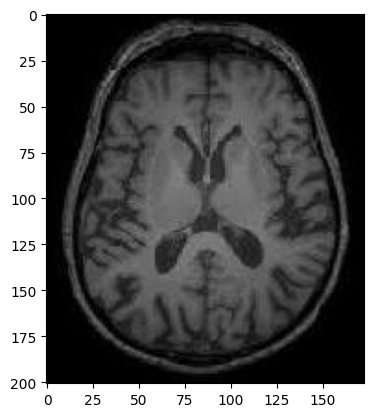

Actual: non-tumorous 
Prediction: non-tumorous


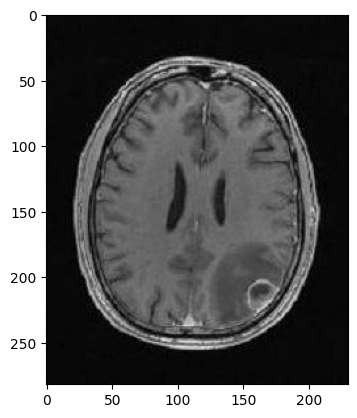

Actual: non-tumorous 
Prediction: non-tumorous


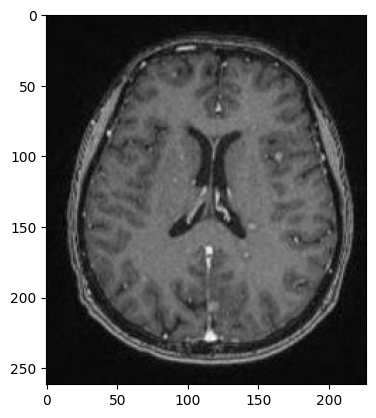

Actual: non-tumorous 
Prediction: non-tumorous


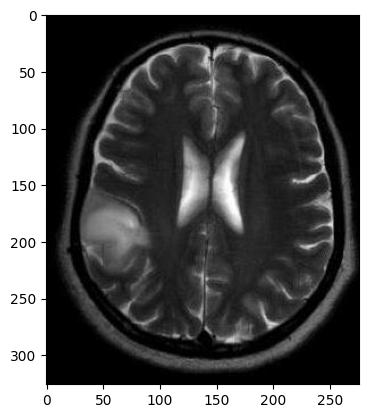

Actual: non-tumorous 
Prediction: non-tumorous


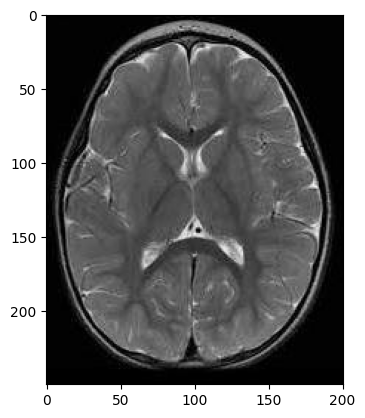

Actual: non-tumorous 
Prediction: non-tumorous


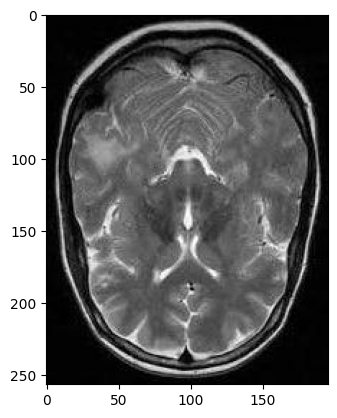

Actual: non-tumorous 
Prediction: non-tumorous


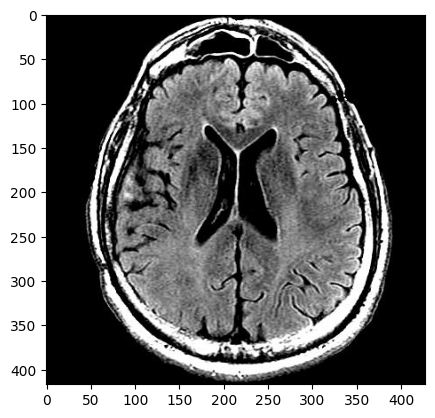

Actual: non-tumorous 
Prediction: non-tumorous


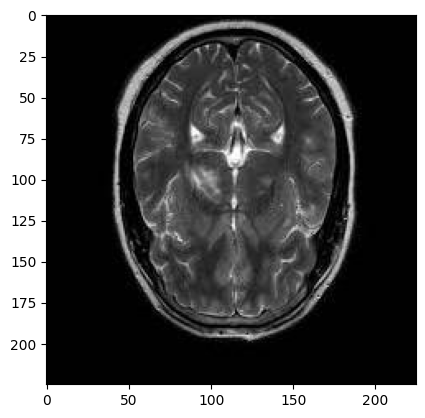

Actual: non-tumorous 
Prediction: non-tumorous


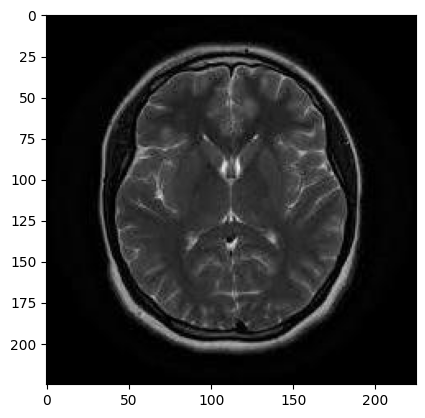

Actual: non-tumorous 
Prediction: non-tumorous


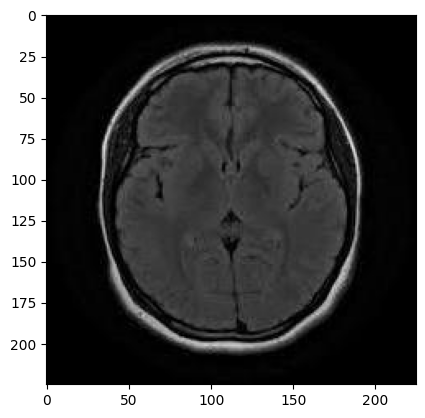

Actual: tumorous 
Prediction: tumorous


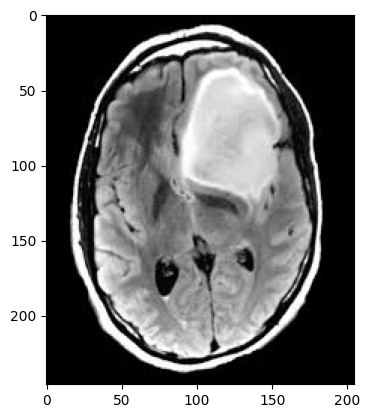

Actual: tumorous 
Prediction: tumorous


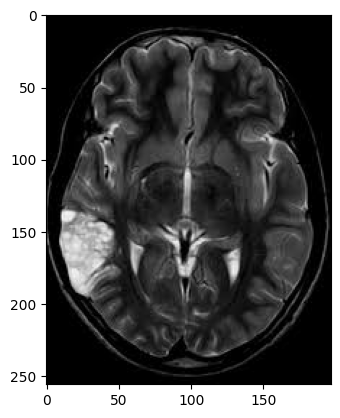

Actual: tumorous 
Prediction: tumorous


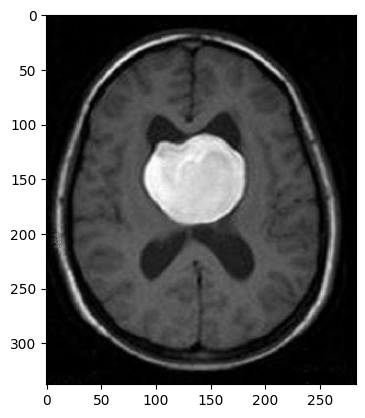

Actual: tumorous 
Prediction: tumorous


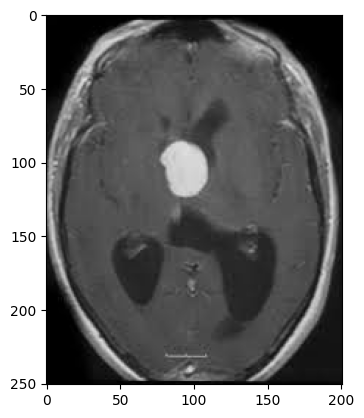

Actual: tumorous 
Prediction: tumorous


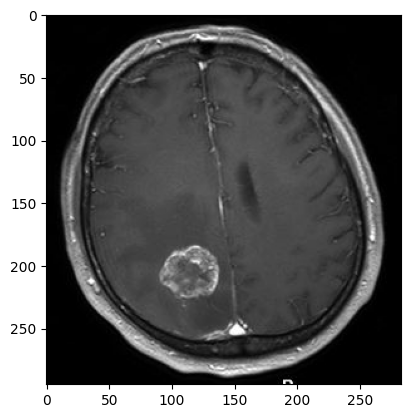

Actual: tumorous 
Prediction: tumorous


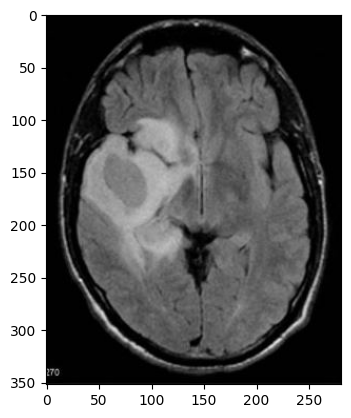

Actual: tumorous 
Prediction: tumorous


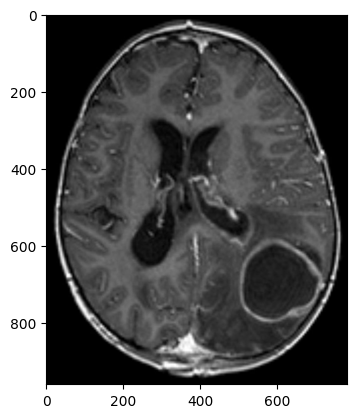

Actual: tumorous 
Prediction: tumorous


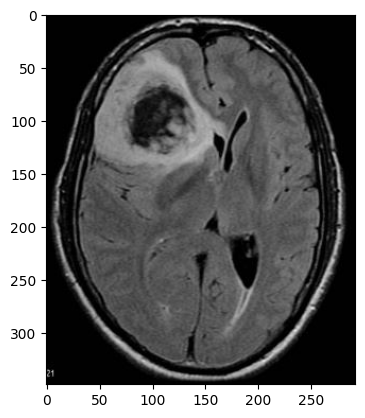

Actual: tumorous 
Prediction: tumorous


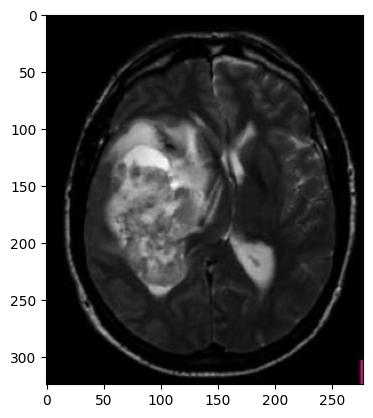

Actual: tumorous 
Prediction: tumorous


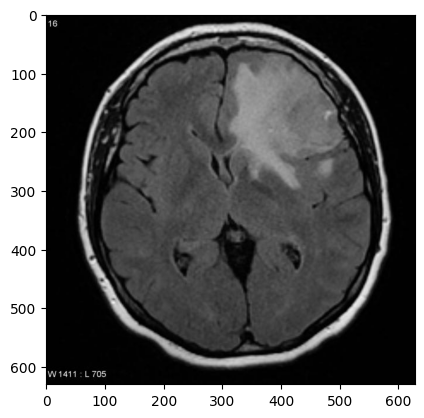

In [56]:
for a,b in df_test4.iterrows():
    img_path = (b['local_path'])
    im = imageio.imread(img_path)

    print("Actual: {} \nPrediction: {}".format(b['Actual'], b['Pred']))
    plt.imshow(im)
    plt.show()
    print('==============================================')

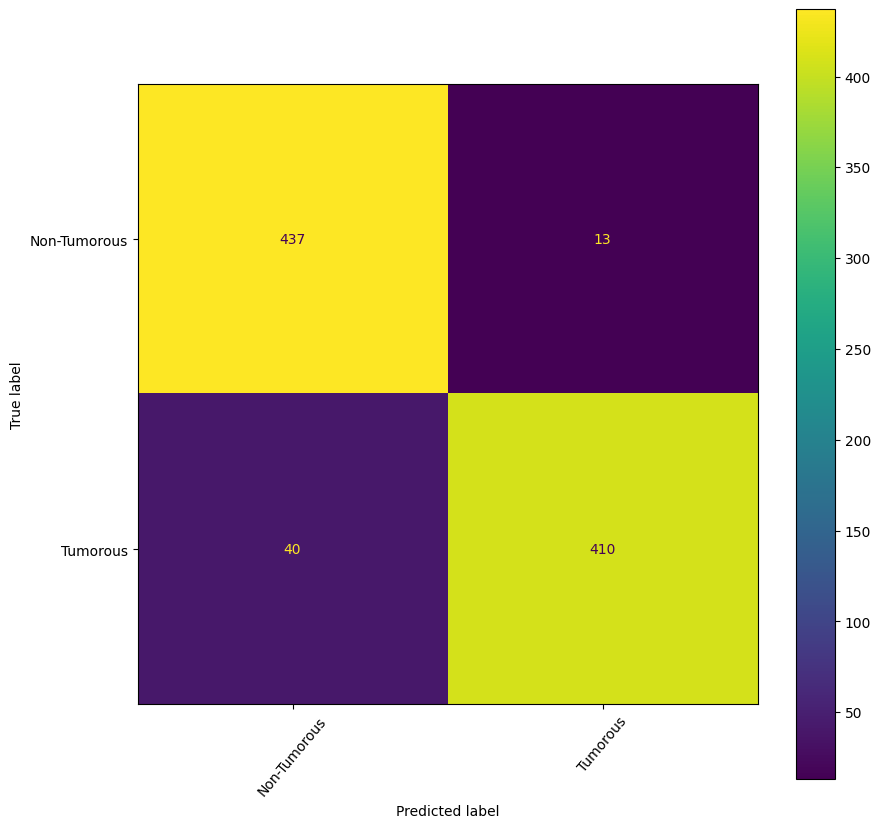

In [57]:
cm = tf.math.confusion_matrix(labels=df_test1['Actual1'].to_numpy(), predictions=df_test1['Pred1'].to_numpy()).numpy()
ls = ['Non-Tumorous', 'Tumorous'] # your y labels()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ls)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(xticks_rotation=50, ax = ax)
plt.show()